# Exploratory Data Analysis and Data Visualization of the Fake Job Postings Data Set

## Summary
Overall, roughly 5% (n=856) of the jobs in this dataset are labeled as fraudulent.

Fraudulent jobs...
- often **don't have written company profile** (32% vs. 84% in non-fraudulent jobs).
- are on average **shorter postings** (2676 vs. 2061 characters), which can be attributed to shorter requirement-passages.
- more frequently **state a salary range** (25% vs. 15%), while median values for lower, upper and mid-range of stated salaries are lower.
- have a larger share of **part-time** (9% vs. 4%) and **entry-level** positions (21% vs. 15%).
- require **lower education** (bachelor: 12% vs. 30%; high school: 20% vs. 11%)
- provide **no company logo** in their posting (33% vs. 82%)
- have their biggest share of jobs (13%) in the **oil & energy industry** (2nd largest: Accounting with 7%)
- are predominantly **located in the US** (84% of all fraudulent jobs)


## Data Exploration

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Adjust some pandas' display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
# import data and have a peek at the first 3 rows
df = pd.read_csv('C:/Users/nickm/Desktop/Coding/Projects/fake-job-postings/fake_job_postings_CLEANED_RECODED.gzip', compression='gzip')
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_description,has_requirements,has_benefits,job_posting,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length,location_country,location_state,location_city,salary_range_from,salary_range_to,salary_range_mid,salary_range_peak_to_peak,has_salary_range,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Associate,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_education_Associate Degree,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,1,1,1,0,"We're Food52, and we've created a groundbreaki...",885.0000,905.0000,852.0000,NaN,2651,US,NY,New York,NaN,NaN,NaN,NaN,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1,1,1,1,"90 Seconds, the worlds Cloud Video Production ...",1286.0000,2077.0000,1433.0000,1292.0000,6097,NZ,NaN,Auckland,NaN,NaN,NaN,NaN,0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,1,1,1,0,Valor Services provides Workforce Solutions th...,879.0000,355.0000,1363.0000,NaN,2606,US,IA,Wever,NaN,NaN,NaN,NaN,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Display DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17599 entries, 0 to 17598
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   job_id                                                17599 non-null  int64  
 1   title                                                 17599 non-null  object 
 2   location                                              17258 non-null  object 
 3   department                                            6271 non-null   object 
 4   salary_range                                          2661 non-null   object 
 5   company_profile                                       14317 non-null  object 
 6   description                                           17598 non-null  object 
 7   requirements                                          14950 non-null  object 
 8   benefits                                              10

In [5]:
# Count number of unique values in each column
df.nunique()

job_id                                                  17599
title                                                   11231
location                                                 3105
department                                               1337
salary_range                                              858
company_profile                                          1709
description                                             14801
requirements                                            11967
benefits                                                 6204
telecommuting                                               2
has_company_logo                                            2
has_questions                                               2
employment_type                                             5
required_experience                                         7
required_education                                         13
industry                                                  131
function

In [6]:
# Show share of missing values in columns
df.isna().sum()/len(df)*100

job_id                                                  0.0000
title                                                   0.0000
location                                                1.9376
department                                             64.3673
salary_range                                           84.8798
company_profile                                        18.6488
description                                             0.0057
requirements                                           15.0520
benefits                                               40.3887
telecommuting                                           0.0000
has_company_logo                                        0.0000
has_questions                                           0.0000
employment_type                                        19.4784
required_experience                                    39.5591
required_education                                     45.5083
industry                                               

## Explore differences between real and fake job postings

### Fraudulent Jobs Distribution

In [7]:
# real-fake-job distribution
fraud_dist = df['fraudulent'].value_counts()
fraud_dist

fraudulent
0    16743
1      856
Name: count, dtype: int64

In [8]:
# percentage values
fraud_dist / len(df)

fraudulent
0   0.9514
1   0.0486
Name: count, dtype: float64

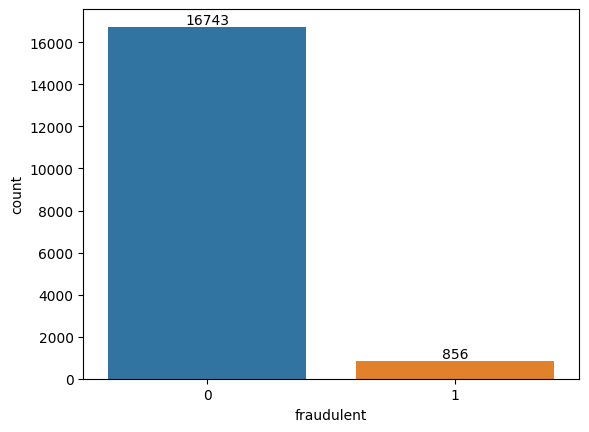

In [9]:
# Plot
ax = plt.subplot()
sns.countplot(x=df['fraudulent'], ax=ax)
ax.bar_label(container=ax.containers[0], labels=fraud_dist);

### Numeric Variables

#### Overview

In [10]:
# Define names of numeric columns
num_cols = df.dtypes[df.dtypes != 'object'].index
num_cols = num_cols.drop('job_id')
print(num_cols, len(num_cols))

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'has_company_profile', 'has_description', 'has_requirements',
       'has_benefits', 'company_profile_length', 'description_length',
       'requirements_length', 'benefits_length', 'job_posting_length',
       'salary_range_from', 'salary_range_to', 'salary_range_mid',
       'salary_range_peak_to_peak', 'has_salary_range',
       'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'required_experience_Associate',
       'required_experience_Director', 'required_experience_Entry level',
       'required_experience_Executive', 'required_experience_Internship',
       'required_experience_Mid-Senior level',
       'required_experience_Not Applicable',
       'required_education_Associate Degree',
       'required_education_Bachelor's Degree',
       'required_education_Certification', 'required_education_D

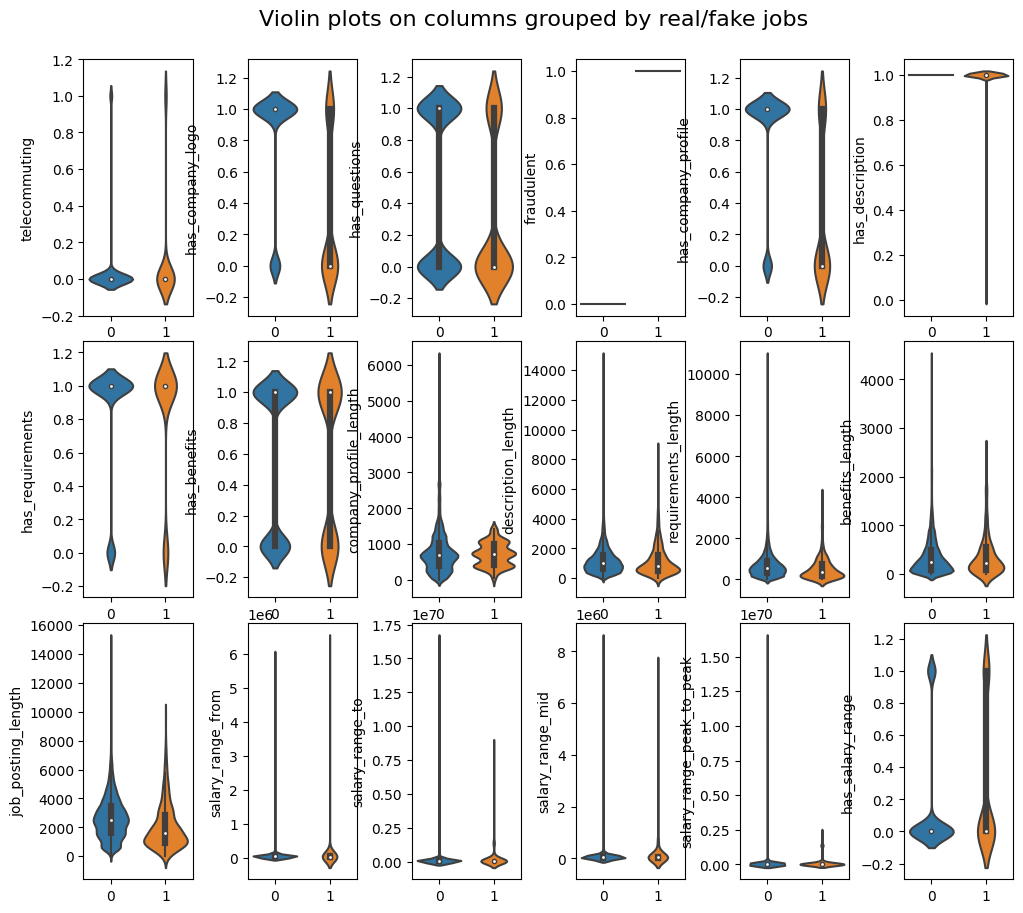

In [11]:
# Create violin plots for all numeric variables, grouped by 'fraudulent' column
fig, axs = plt.subplots(figsize=(12, 10), ncols=6, nrows=3)
plt.subplots_adjust(wspace=0.5, hspace=0.1)
plt.suptitle('Violin plots on columns grouped by real/fake jobs', size=16)
plt.subplots_adjust(top=0.93)
axs = axs.ravel()

for ax_nr, col in enumerate(num_cols[:18]):
    sns.violinplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr]).set(xlabel='')

#### Text Presence

In [12]:
# define columns to investigate
text_presence_cols = ['has_company_profile', 'has_description', 'has_requirements', 'has_benefits']

In [13]:
# Share of presence of text parts
df.groupby(by='fraudulent')[text_presence_cols].mean().T

fraudulent,0,1
has_company_profile,0.8386,0.3224
has_description,1.0000,0.9988
has_requirements,0.8508,0.8236
has_benefits,0.5969,0.5806


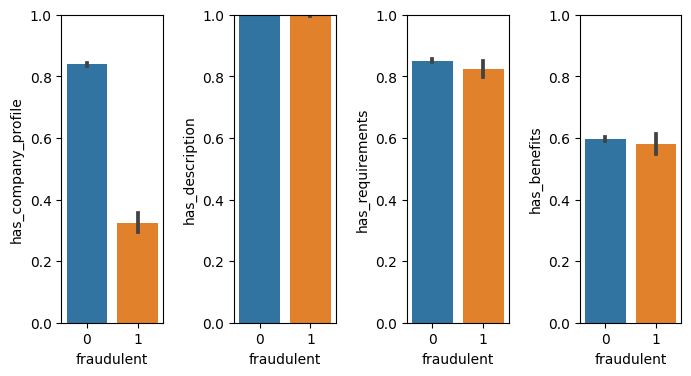

In [14]:
# Plots
fig, axs = plt.subplots(figsize=(8, 4), ncols=len(text_presence_cols))
plt.subplots_adjust(wspace=0.7)

for ax_nr, col in enumerate(text_presence_cols):
    sns.barplot(y=df[col], x=df['fraudulent'], ax=axs[ax_nr]).set(ylim=(0,1))

#### Text Length

In [15]:
# Define columns to investigate
text_len_cols = df.filter(like='length').columns

In [16]:
# Comparison of average lengths of postings - Mean
df.groupby(by='fraudulent')[text_len_cols].mean().T

fraudulent,0,1
company_profile_length,762.4219,719.5616
description_length,1220.2280,1159.4327
requirements_length,703.6746,544.1121
benefits_length,349.3119,367.5111
job_posting_length,2675.8048,2060.5958


In [17]:
# Comparison of average lengths of postings - Median
df.groupby(by='fraudulent')[text_len_cols].median().T

fraudulent,0,1
company_profile_length,684.0000,718.0000
description_length,1026.0000,846.0000
requirements_length,570.0000,352.0000
benefits_length,237.0000,235.0000
job_posting_length,2539.0000,1644.0000


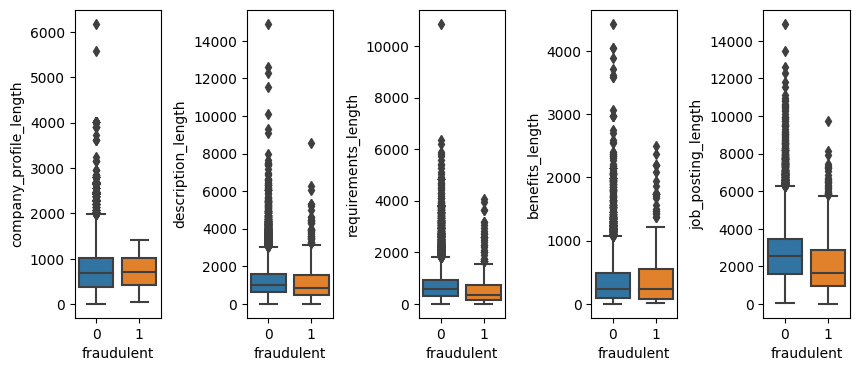

In [18]:
# Plots
fig, axs = plt.subplots(figsize=(10, 4), ncols=len(text_len_cols))
plt.subplots_adjust(wspace=1)

for ax_nr, col in enumerate(text_len_cols):
    sns.boxplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr])

#### Salary

In [19]:
# Share of postings with stated salary
df.groupby(by='fraudulent')['has_salary_range'].mean()

fraudulent
0   0.1460
1   0.2523
Name: has_salary_range, dtype: float64

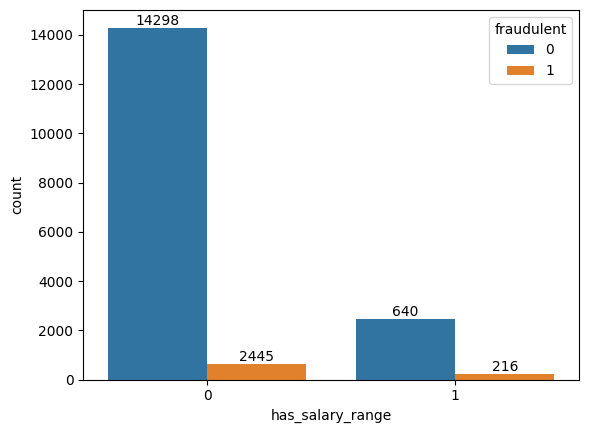

In [20]:
# Plot
ax = plt.subplot()
sns.countplot(x=df['has_salary_range'], hue=df['fraudulent'], ax=ax)

bar_labels = df.groupby(by=['has_salary_range', 'fraudulent'])['job_id'].count().values
ax.bar_label(container=ax.containers[0], labels=bar_labels[[0,1]])
ax.bar_label(container=ax.containers[1], labels=bar_labels[[2,3]]);

In [21]:
# Define columns to investigate
salary_cols = df.filter(like='salary_range_').columns

In [22]:
# Comparison of salary - Mean
df.groupby(by='fraudulent')[salary_cols].mean().T

fraudulent,0,1
salary_range_from,60776.5764,67922.5324
salary_range_to,110721.6125,164008.0926
salary_range_mid,85749.0944,115965.3125
salary_range_peak_to_peak,49945.0361,96085.5602


In [23]:
# Comparison of salary - Median
df.groupby(by='fraudulent')[salary_cols].median().T

fraudulent,0,1
salary_range_from,40000.0000,30000.0000
salary_range_to,54000.0000,45000.0000
salary_range_mid,47500.0000,37500.0000
salary_range_peak_to_peak,12000.0000,10000.0000


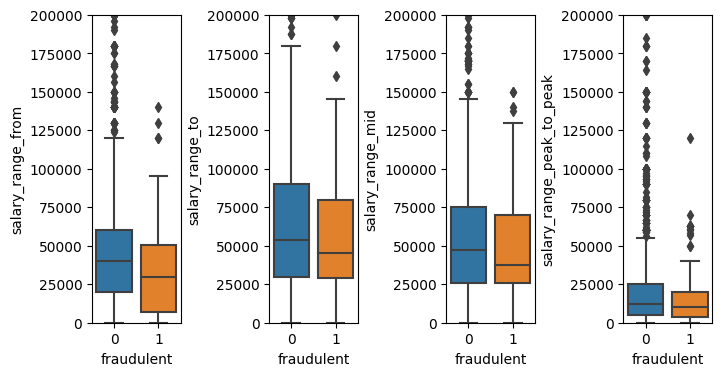

In [24]:
# Plots
fig, axs = plt.subplots(figsize=(8, 4), ncols=len(salary_cols))
plt.subplots_adjust(wspace=1)

for ax_nr, col in enumerate(salary_cols):
    sns.boxplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr])
    axs[ax_nr].set(ylim=(0, 2e5))

#### Employment Type

In [25]:
# Define one-hot-encoded columns to analyze
employment_cols = df.filter(like='employment_type_').columns
employment_cols

Index(['employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary'],
      dtype='object')

In [26]:
# Comparison of employment type
df.groupby('fraudulent')[employment_cols].mean().T

fraudulent,0,1
employment_type_Contract,0.0879,0.0502
employment_type_Full-time,0.6532,0.5689
employment_type_Other,0.0125,0.0175
employment_type_Part-time,0.0417,0.0853
employment_type_Temporary,0.0140,0.0023


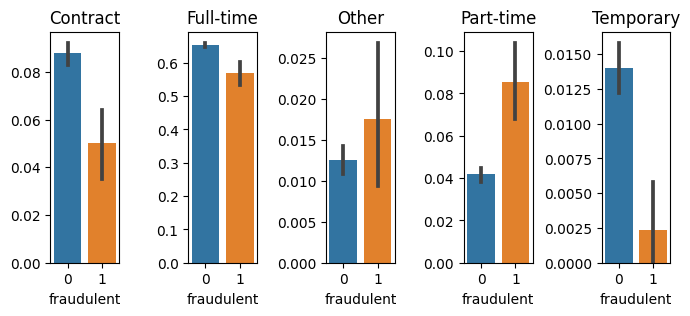

In [27]:
# Plots
fig, axs = plt.subplots(figsize=(8, 3), ncols=len(employment_cols))
plt.subplots_adjust(wspace=1)

for ax_nr, col in enumerate(employment_cols):
    plot_title = col.replace('employment_type_', '')
    sns.barplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr])
    axs[ax_nr].set(title=plot_title, ylabel='')

#### Required Experience

In [28]:
# Define required experience columns to analyze
experience_cols = df.filter(like='required_experience_').columns
experience_cols

Index(['required_experience_Associate', 'required_experience_Director',
       'required_experience_Entry level', 'required_experience_Executive',
       'required_experience_Internship',
       'required_experience_Mid-Senior level',
       'required_experience_Not Applicable'],
      dtype='object')

In [29]:
# Comparison of required experience
df.groupby('fraudulent')[experience_cols].mean().T

fraudulent,0,1
required_experience_Associate,0.1329,0.0491
required_experience_Director,0.0219,0.0199
required_experience_Entry level,0.1469,0.2068
required_experience_Executive,0.0078,0.0117
required_experience_Internship,0.0216,0.0117
required_experience_Mid-Senior level,0.2183,0.1320
required_experience_Not Applicable,0.0603,0.0701


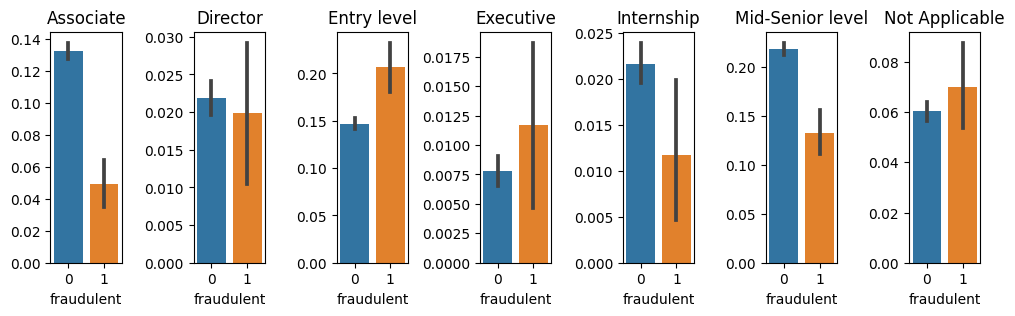

In [30]:
# Plots
fig, axs = plt.subplots(figsize=(12, 3), ncols=len(experience_cols))
plt.subplots_adjust(wspace=1)

for ax_nr, col in enumerate(experience_cols):
    plot_title = col.replace('required_experience_', '')
    sns.barplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr])
    axs[ax_nr].set(title=plot_title, ylabel='')

#### Required Education

In [31]:
# Define required education columns to analyze
education_cols = df.filter(like='required_education_').columns
education_cols

Index(['required_education_Associate Degree',
       'required_education_Bachelor's Degree',
       'required_education_Certification', 'required_education_Doctorate',
       'required_education_High School or equivalent',
       'required_education_Master's Degree', 'required_education_Professional',
       'required_education_Some College Coursework Completed',
       'required_education_Some High School Coursework',
       'required_education_Unspecified', 'required_education_Vocational'],
      dtype='object')

In [32]:
# Comparison of required education
df.groupby('fraudulent')[education_cols].mean().T

fraudulent,0,1
required_education_Associate Degree,0.0154,0.0070
required_education_Bachelor's Degree,0.2986,0.1157
required_education_Certification,0.0087,0.0222
required_education_Doctorate,0.0015,0.0012
required_education_High School or equivalent,0.1088,0.1963
required_education_Master's Degree,0.0230,0.0362
required_education_Professional,0.0041,0.0047
required_education_Some College Coursework Completed,0.0058,0.0035
required_education_Some High School Coursework,0.0004,0.0234
required_education_Unspecified,0.0781,0.0713


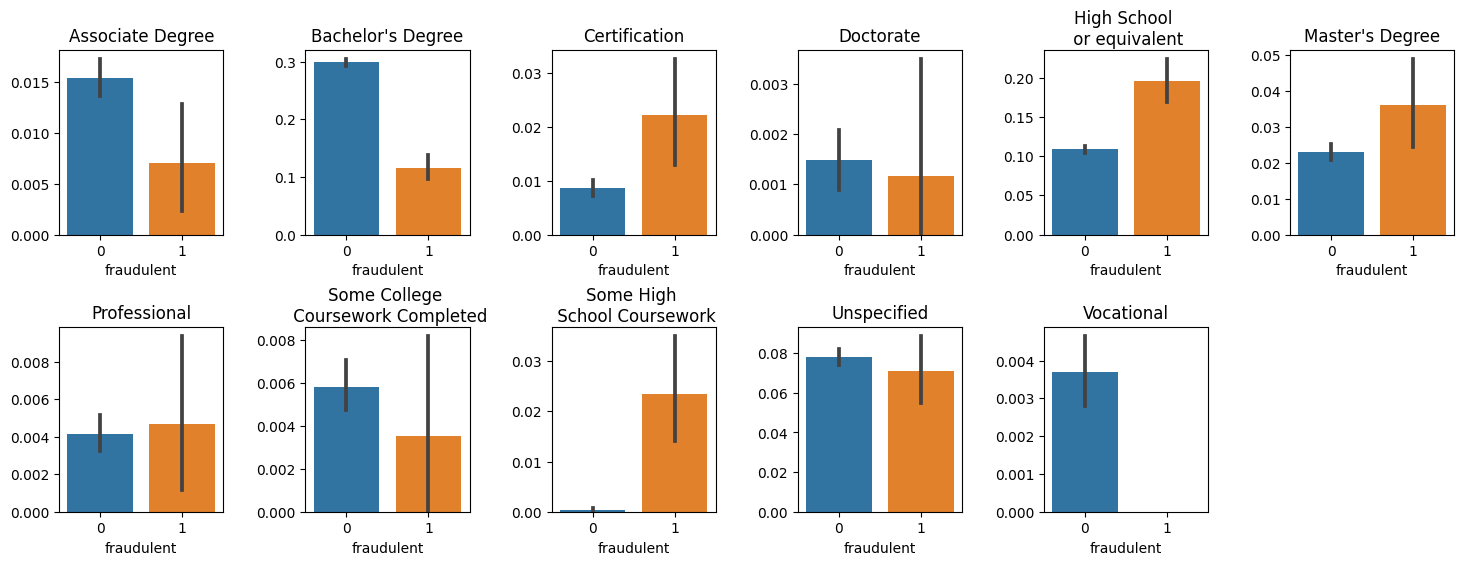

In [33]:
# Plots
fig, axs = plt.subplots(figsize=(18, 6), ncols=6, nrows=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axs = axs.ravel()

for ax_nr, col in enumerate(education_cols):
    plot_title = col.replace('required_education_', '')
    if len(plot_title.split()) >= 4:
        split_plot_title = plot_title.split()
        split_plot_title.insert(len(split_plot_title)//2, '\n')
        plot_title = ' '.join(split_plot_title)
    sns.barplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr])
    axs[ax_nr].set_title(plot_title, wrap=True)
    axs[ax_nr].set(ylabel='')
fig.delaxes(axs[-1])

#### Other

In [34]:
# Define columns to investigate
other_cols = ['telecommuting', 'has_company_logo', 'has_questions']

In [35]:
# Share of jobs with telecommuting, company logo and questions
df.groupby(by='fraudulent')[other_cols].mean().T

fraudulent,0,1
telecommuting,0.0412,0.0748
has_company_logo,0.8179,0.3294
has_questions,0.5023,0.2909


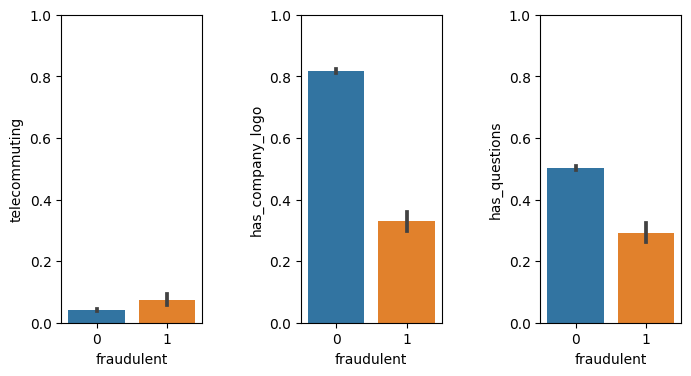

In [36]:
# Plots
fig, axs = plt.subplots(figsize=(8, 4), ncols=len(other_cols))
plt.subplots_adjust(wspace=0.7)

for ax_nr, col in enumerate(other_cols):
    sns.barplot(y=df[col], x=df['fraudulent'], ax=axs[ax_nr]).set(ylim=(0,1))

### Categorical Variables

In [37]:
# Define columns to analyse
object_cols = df.dtypes[df.dtypes == 'object'].index
object_cols

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'job_posting', 'location_country', 'location_state', 'location_city'],
      dtype='object')

In [38]:
# Extract the top 3 unique values for real vs. fake jobs
column = []
characteristic_real, valuecount_n_real, valuecount_p_real = [], [], []
characteristic_fake, valuecount_n_fake, valuecount_p_fake = [], [], []

n_real = len(df.loc[df['fraudulent']==0])
n_fake = len(df.loc[df['fraudulent']==1])

topx = 3

# for each defined column...
for c in object_cols:
    # first check how many unique values there are; pick maximum [topx]
    n = min(topx, len(df[c].value_counts()))
    # store column label n times
    column.extend(*[[c]*n])

    # store label, count and share of the topx values for real...
    characteristic_real.extend(df.loc[df['fraudulent']==0, c].value_counts().head(topx).index)
    valuecount_n_real.extend(df.loc[df['fraudulent']==0, c].value_counts().head(topx).values)
    valuecount_p_real.extend(np.round(df.loc[df['fraudulent']==0, c].value_counts().head(topx).values/n_real*100, 2))
    # ... and fake jobs
    characteristic_fake.extend(df.loc[df['fraudulent']==1, c].value_counts().head(topx).index)
    valuecount_n_fake.extend(df.loc[df['fraudulent']==1, c].value_counts().head(topx).values)
    valuecount_p_fake.extend(np.round(df.loc[df['fraudulent']==1, c].value_counts().head(topx).values/n_fake*100, 2))

In [39]:
# Combine and display extracted values
stats = pd.DataFrame({'column': column,
                      'characteristic_real': pd.Series(characteristic_real).str.slice(stop=30),
                      'valuecount_real_n_(%)': [f'{n} ({p}%)' for n, p in zip(valuecount_n_real, valuecount_p_real)],
                      'characteristic_fake': pd.Series(characteristic_fake).str.slice(stop=30),
                      'valuecount_fake_n_(%)': [f'{n} ({p}%)' for n, p in zip(valuecount_n_fake, valuecount_p_fake)],
                      })
stats

,column,characteristic_real,valuecount_real_n_(%),characteristic_fake,valuecount_fake_n_(%)
0,title,English Teacher Abroad,309 (1.85%),Cruise Staff Wanted *URGENT*,20 (2.34%)
1,title,Graduates: English Teacher Abr,144 (0.86%),Home Based Payroll Typist/Data,20 (2.34%)
2,title,Customer Service Associate,141 (0.84%),Data Entry Admin/Clerical Posi,18 (2.1%)
3,location,"GB, LND, London",716 (4.28%),"US, TX, Houston",91 (10.63%)
4,location,"US, NY, New York",624 (3.73%),"AU, NSW, Sydney",30 (3.5%)
5,location,"GR, I, Athens",462 (2.76%),"US, ,",28 (3.27%)
6,department,Sales,529 (3.16%),Engineering,46 (5.37%)
7,department,Engineering,437 (2.61%),Clerical,26 (3.04%)
8,department,Marketing,395 (2.36%),Oil & Energy,24 (2.8%)
9,salary_range,40000-50000,65 (0.39%),7200-1380000,10 (1.17%)
